# API-201 ABC REVIEW SESSION #4
**Friday, September 30**

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture Recap

# Exercises

## Exercise 1: Wildfire expectations

Suppose the annual probability of a property being affected by a wildfire in California is fixed at 0.0003 (0.03%) and is independent across years.

**a. What is the expected number of fires that property would be affected by in 30 years?**

Hint: Let $X_t$ be a Bernoulli random variable that equals 1 with probability 0.0003 and 0 otherwise. Then the number of fires in 30 years is $Y = X_1 + X_2 + ... + X_{30}$.


#### Your answer here!

##### START

\begin{align*}
E[Y] &= E[X_1 + X_2 + ... + X_{30}] \\
     &= E[X_1] + E[X_2] + ... + E[X_{30}] \\
     &= 30 \times E[X_t] \\
     &= 30 \times 0.0003 \\
     &= 0.009
\end{align*}

We would expect a property to be affected by 0.009 fires in 30 years.

##### END




**b. What is the standard deviation of the number of fires in 30 years?**

Hint: $Var(X_t) = 0.0003 \times (1 - 0.0003) \approx 0.0003$.

#### Your answer here!

##### START

Because we are told to suppose that wildfires are independent across years, we can express the variance of the number of wildfires affecting a property as the sum of variances for each year:

\begin{align*}
Var(Y) &= Var(X_1 + X_2 + ... + X_{30}) \\
     &= Var(X_1) + Var(X_2) + ... + Var(X_{30}) \mbox{ (by independence)} \\
     &= 30 \times Var(X_t) \\
     &= 30 \times 0.0003 \\
     &= 0.009
\end{align*}

$SD(Y) = \sqrt{Var(Y)} = \sqrt{0.009} = 0.095$

##### END




**c. Suppose the probability of being affected by a fire increases in each year.**

* (i.) Can we still calculate the expected number of fires in 30 years by adding the probability of fire in each year?

#### Your answer here!

##### START

Yes! Instead of multiplying a single probability times the number of years, we would now need to add up 30 different probabilities.

##### END


* (ii.) Can we still calculate the variance in number of fires in 30 years by adding the variance of fire in each year?

#### Your answer here!

##### START

Yes! While the probability of fire is increasing with time, whether there is fire in a particular year is still independent of fires in other years. For example, the lack of a fire in the first year doesn't increase the probability of a fire in the next year, even if the probability of fire tends to increase with time.

##### END



**d. You consult a wildfire expert and it turns out that after a wildfire impacts a property, it is much less likely that another wildfire will affect that property for the next 5 years. What does that mean about the independence of wildfires over time? Does this impact how we calculate the expectation or variance of the number of wildfires in 30 years?**

#### Your answer here!

##### START

This means that being affected by a wildfire in a given year is dependent on whether your property was affected by a wildfire in another year. Because the expectation of a sum is always exqual to the sum of expectations (linearity of expectations) this doesn't impact how we calculate the expected number of wildfires in 30 years. However, the variance of a sum is only equal to a sum of variances if the data is independent. Therefore, we cannot simply add annual variances to calculate the variance of the total number of wildfires in 30 years.

##### END


## Exercise 2: Stock returns and the normal distribution

Imagine that an investor is deciding whether to buy stocks from company A or company B. Historical data indicates that the average annual return of the stocks has been approximately 8% and 6% respectively, and the standard deviation of the returns has been 12% and 7% respectively.

**a. Using simulations, model the stock return of each company next year as a normal distribution using the parameters below. Plot both distributions.**

In [23]:
# Load tidyverse
library(tidyverse)

# Set seed 
set.seed(1)

# Number of scenarios
num_sims <- 1e5

# Mean of annual return 
mean_return_a <- 0.08
mean_return_b <- 0.06

# Standard deviation of annual return
sd_return_a <- 0.12
sd_return_b <- 0.07

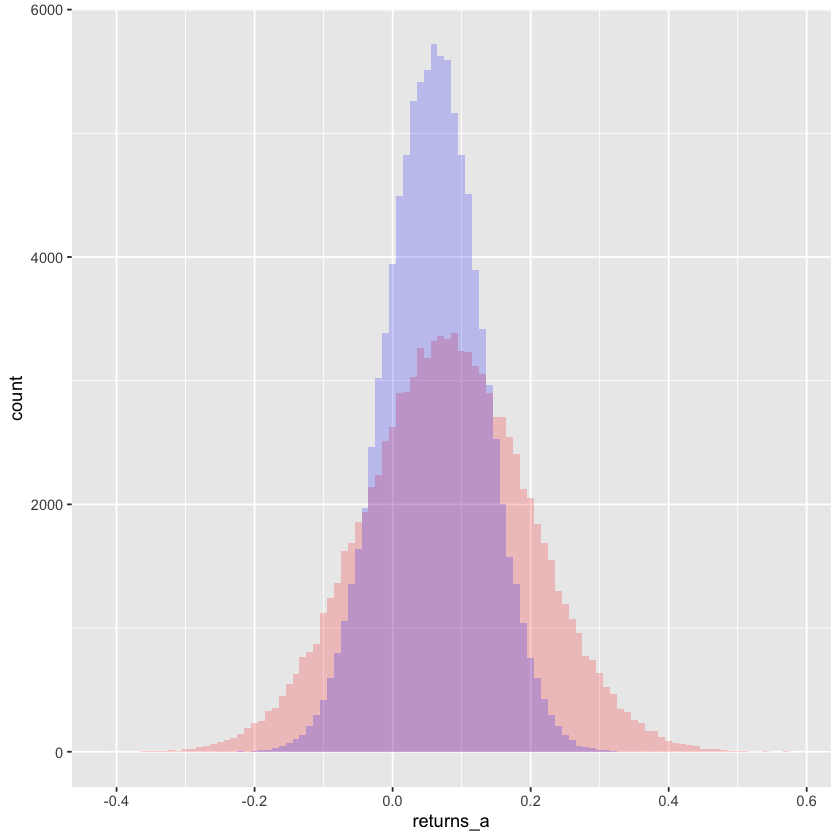

In [27]:
# Your answer here!

# START

sims_a <- rnorm(num_sims,mean_return_a, sd_return_a)
sims_b <- rnorm(num_sims,mean_return_b, sd_return_b)

returns_simulation <- tibble(returns_a = sims_a, returns_b = sims_b)
ggplot(returns_simulation) +
    geom_histogram(aes(x=returns_a),binwidth=0.01,fill = "red",alpha=0.2) +
        geom_histogram(aes(x=returns_b),binwidth=0.01,fill = "blue",alpha=0.2)

# END

**b. Which stock has a higher probability of yielding positive returns next year?**

In [32]:
# Your answer here!

# START

prob_positive_a <- mean(returns_simulation$returns_a>0)
prob_positive_b <- mean(returns_simulation$returns_b>0)  
c(prob_positive_a,prob_positive_b)

# END

[1] 0.74902 0.80394

**c. After a positive year for both companies, stock's A return was 10% and stock's B was 9%. Calculate the z-score and discuss which stock performed better relative to past years.

In [33]:
# Your answer here!

# START

z_score_a <- (0.1-mean_return_a)/sd_return_a
z_score_b <- (0.09-mean_return_b)/sd_return_b
c(z_score_a, z_score_b)

# END

[1] 0.1666667 0.4285714

**d. Suppose that the investor decides to buy stock from company B. Now they are interested in calculating the probability of obtaining only positive returns in 10 years. Calculate this probability using simulations.**

In [35]:
# Parameters
num_years <- 10

In [56]:
# START

sum(rbernoulli(num_years,prob_positive_b))
sims_b_10years <- replicate(num_sims,sum(rbernoulli(num_years,prob_positive_b)))
head(sims_b_10years,10)
mean(sims_b_10years==num_years)

# END

[1] 9

[1]  7  9  9  6  9  7  5 10  7  8

[1] 0.1133